Import Libraries and Load Dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [9]:
 #Load the dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df = df[['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']]

In [11]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Weight
0,13500,23,46986,Diesel,90,0,2000,3,1165
1,13750,23,72937,Diesel,90,0,2000,3,1165
2,13950,24,41711,Diesel,90,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,1300,3,1015
1434,7250,70,16916,Petrol,86,0,1300,3,1015


Exploratory Data Analysis (EDA)

In [14]:
# Basic summary
print(df.describe())
print(df.info())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors      Weight  
count   1436.00000  1436.000000  1436.00000  
mean    1576.85585     4.033426  1072.45961  
std      424.38677     0.952677    52.64112  
min     1300.00000     2.000000  1000.00000  
25%     1400.00000     3.000000  1040.00000  
50%     1600.00000     4.00000

In [16]:
# Check missing values
print(df.isnull().sum())


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Weight       0
dtype: int64


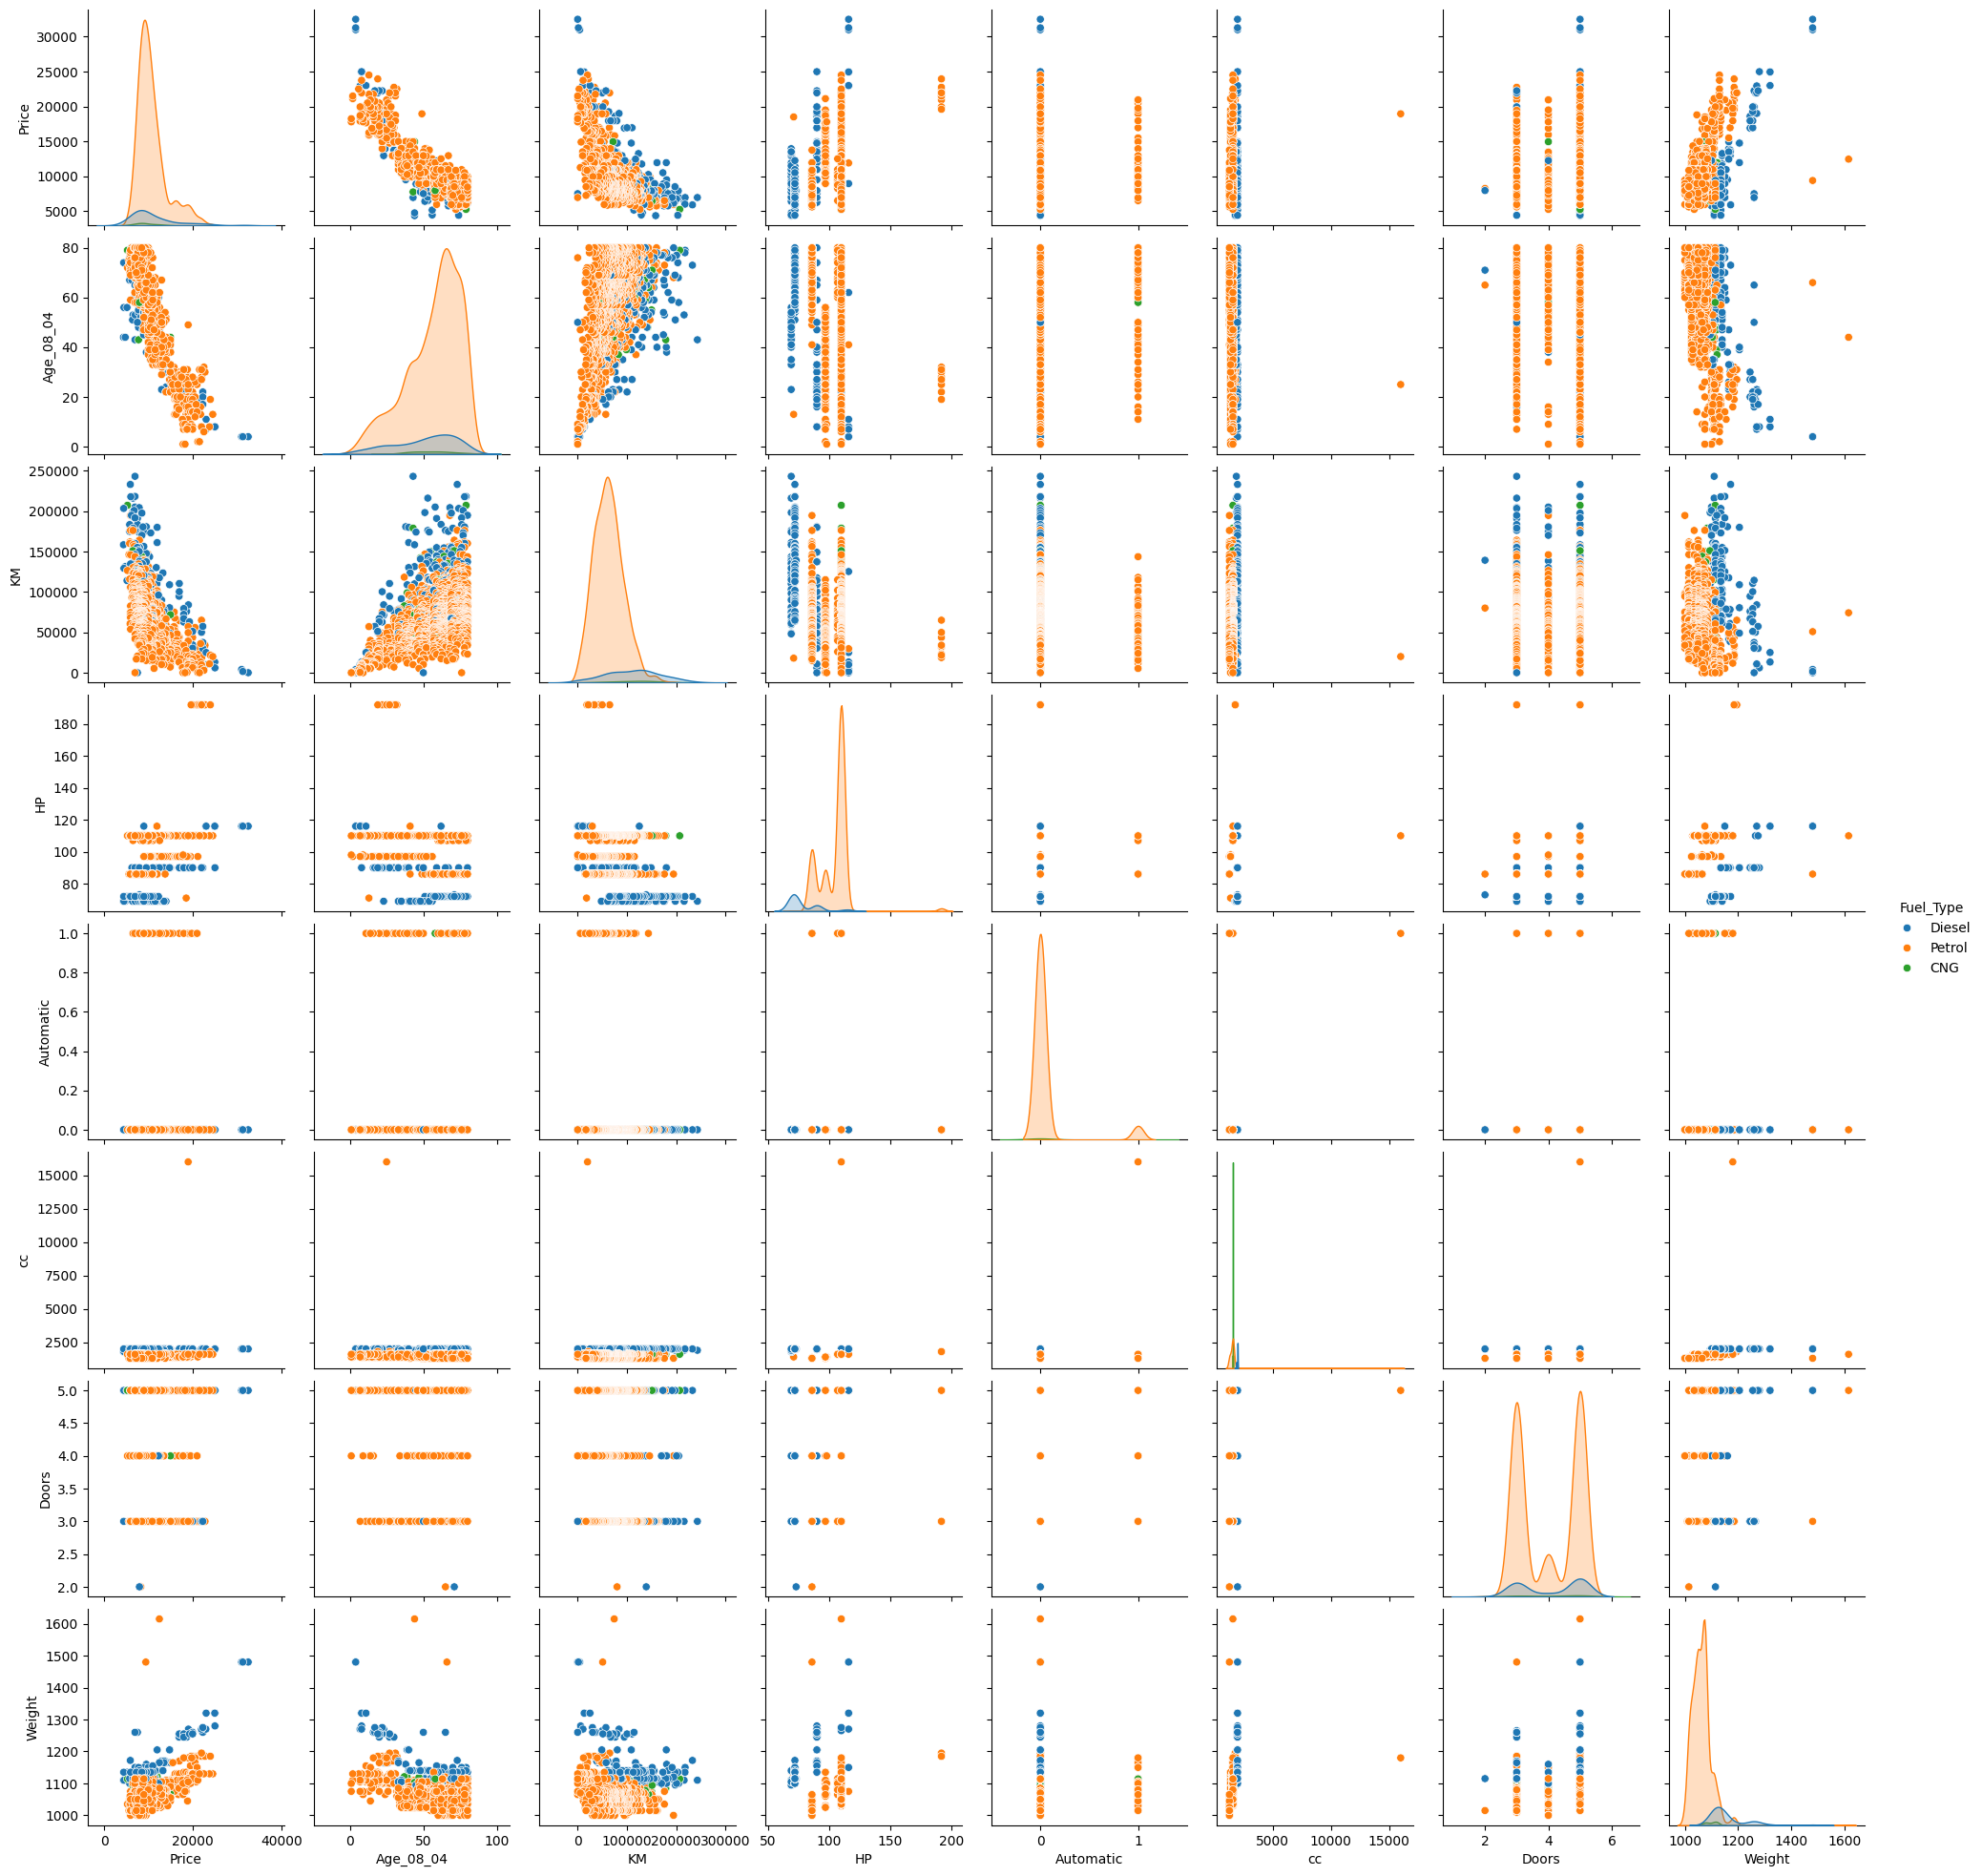

In [18]:
# Visualizations
sns.pairplot(df, hue='Fuel_Type')
plt.show()


In [24]:
# Make a copy of the dataframe for correlation
df_corr = df.copy()

In [26]:
# Convert categorical 'Fuel_Type' into dummy variables
df_corr = pd.get_dummies(df_corr, columns=['Fuel_Type'], drop_first=True)

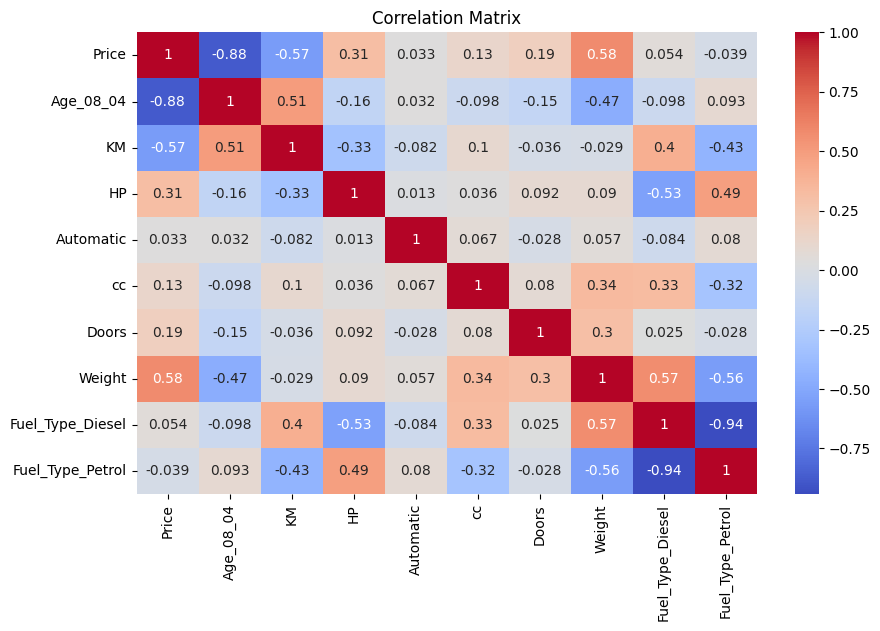

In [28]:
# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Data Preprocessing

In [31]:
# Convert categorical Fuel_Type into dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [33]:
# Features and Target
X = df.drop("Price", axis=1)
y = df["Price"]


In [35]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Build and Interpret MLR Models

Model 1:All Features

In [42]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print("Model 1 Coefficients:")
for name, coef in zip(X.columns, model1.coef_):
    print(f"{name}: {coef:.2f}")

Model 1 Coefficients:
Age_08_04: -2246.53
KM: -597.15
HP: 236.28
Automatic: 21.35
cc: -12.83
Doors: -80.46
Weight: 1371.83
Fuel_Type_Diesel: 1.30
Fuel_Type_Petrol: 472.02


Model 2: Drop cc and Doors

In [48]:
X2 = df.drop(["Price", "cc", "Doors"], axis=1)
X2_scaled = scaler.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)


Model 3: Only Top Correlated Features

In [53]:
X3 = df[['Age_08_04', 'KM', 'Weight']]
X3_scaled = scaler.fit_transform(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)

Model Evaluation

In [58]:
def evaluate_model(y_test, y_pred, name):
    print(f"\n{name} Performance:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

evaluate_model(y_test, y_pred1, "Model 1")
evaluate_model(y2_test, y_pred2, "Model 2")
evaluate_model(y3_test, y_pred3, "Model 3")


Model 1 Performance:
R² Score: 0.8332952678447363
RMSE: 1491.4107550884646

Model 2 Performance:
R² Score: 0.8347720832929076
RMSE: 1484.7899527231043

Model 3 Performance:
R² Score: 0.8324973071292439
RMSE: 1494.9759401829615


Apply Lasso and Ridge Regression

Ridge Regression


In [61]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
evaluate_model(y_test, ridge_pred, "Ridge Regression")


Ridge Regression Performance:
R² Score: 0.8334708246311439
RMSE: 1490.625245748384


Lasso Regression

In [65]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
evaluate_model(y_test, lasso_pred, "Lasso Regression")


Lasso Regression Performance:
R² Score: 0.8332941356627808
RMSE: 1491.4158195682082


Conclusion 

* Model 1 used all features and performed best based on R² and RMSE.

* Model 2 tested feature reduction (without cc, Doors) — slightly lower performance.

* Model 3 with only top features (Age, KM, Weight) — simpler but less accurate.

* Ridge helped control multicollinearity, Lasso slightly reduced unimportant feature influence.

Interview Questions

1.What is Normalization & Standardization and how is it helpful?

Normalization
* Definition: Normalization (or Min-Max Scaling) is the process of rescaling data so that all feature values fall within a specific range, usually [0, 1].

Formula:
* Xnorm=X-Xmin/Xmax-Xmin

          

Example:
* If age ranges from 18 to 60, age = 30 → normalized.
* 30-18/60-18=12/42=0.29

 Standardization
* Definition: Standardization (Z-score normalization) transforms data so that it has a mean of 0 and standard deviation of 1.

Formula:
* Xstd=X-μ/σ

Where:

* μ = mean of the feature

* σ = standard deviation

Example:
If the mean weight is 1500 kg and std dev is 100 kg, and a car weighs 1700 kg:

1700-1500/100=2.0

2.What techniques can be used to address multicollinearity in multiple linear regression?

Remove Highly Correlated Predictors
* Use a correlation matrix or Variance Inflation Factor (VIF) to detect high correlations.

* Drop one of the correlated variables.

Principal Component Analysis (PCA)
* Reduces dimensionality by transforming correlated variables into uncorrelated principal components.

* Useful if preserving all information but removing multicollinearity is the goal.



Regularization Techniques
* Lasso Regression:
Performs feature selection by shrinking some coefficients to zero.

Eliminates irrelevant variables automatically.

*  Ridge Regression:
Shrinks all coefficients slightly.

Doesn’t remove variables but reduces the impact of collinearity.